In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("application_train.csv")

In [3]:
len(data.columns)

122

In [4]:
len(data.columns)

122

In [5]:
# 檢查空值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
# 計算空值站欄位的百分比
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
# Missing values statistics
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
missing_values = missing_values_table(data)
print(missing_values)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.
                              Missing Values  % of Total Values
COMMONAREA_MEDI                       214865               69.9
COMMONAREA_AVG                        214865               69.9
COMMONAREA_MODE                       214865               69.9
NONLIVINGAPARTMENTS_MEDI              213514               69.4
NONLIVINGAPARTMENTS_MODE              213514               69.4
NONLIVINGAPARTMENTS_AVG               213514               69.4
FONDKAPREMONT_MODE                    210295               68.4
LIVINGAPARTMENTS_MODE                 210199               68.4
LIVINGAPARTMENTS_MEDI                 210199               68.4
LIVINGAPARTMENTS_AVG                  210199               68.4
FLOORSMIN_MODE                        208642               67.8
FLOORSMIN_MEDI                        208642               67.8
FLOORSMIN_AVG                         208642               67.8
YEARS_BUILD_MODE

In [8]:
print(data["COMMONAREA_AVG"])

0         0.0143
1         0.0605
2            NaN
3            NaN
4            NaN
           ...  
307506    0.0202
307507    0.0022
307508    0.0123
307509       NaN
307510    0.0176
Name: COMMONAREA_AVG, Length: 307511, dtype: float64


## 處理REGION_POPULATION_RELATIVE的異常值缺失值

In [9]:
data['REGION_POPULATION_RELATIVE'].min() #檢查人口密度有沒有負的

0.00029

## 處理DAYS_BIRTH的異常值缺失值

In [10]:
(data['DAYS_BIRTH']/-365).describe() #查看出生天數有沒有異常值

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

## 處理DAYS_EMPLOYED的異常值缺失值

In [11]:
(data['DAYS_EMPLOYED']/-365).describe() #查看工作天數異常值

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

In [12]:
error = data[data['DAYS_EMPLOYED']>0] #檢查是否異常值都是3652443,是
error['DAYS_EMPLOYED'].drop_duplicates()

8    365243
Name: DAYS_EMPLOYED, dtype: int64

In [13]:
error1 = error.groupby('DAYS_EMPLOYED').size()
print(error1)

DAYS_EMPLOYED
365243    55374
dtype: int64


In [14]:
print(len(error['DAYS_EMPLOYED']))

55374


In [15]:
data['DAYS_EMPLOYED_ANOM'] = data["DAYS_EMPLOYED"] == 365243

In [16]:
print(data['DAYS_EMPLOYED_ANOM'])

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507     True
307508    False
307509    False
307510    False
Name: DAYS_EMPLOYED_ANOM, Length: 307511, dtype: bool


In [17]:
print(data["DAYS_EMPLOYED"])

0           -637
1          -1188
2           -225
3          -3039
4          -3038
           ...  
307506      -236
307507    365243
307508     -7921
307509     -4786
307510     -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64


In [18]:
# 把非365243的列挑出來取中位數，為了填補原本是異常值(365243的列)
non_anom = data["DAYS_EMPLOYED"].apply(lambda x:0 if x==365243 else x)
print(non_anom.median()) 

-1213.0


In [19]:
# 將異常值填上該欄的中位數
data['DAYS_EMPLOYED'].replace({365243: -1213.0}, inplace = True)

In [20]:
print(data['DAYS_EMPLOYED'])

0         -637
1        -1188
2         -225
3        -3039
4        -3038
          ... 
307506    -236
307507   -1213
307508   -7921
307509   -4786
307510   -1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64


## 處理DAYS_REGISTRATION的異常值缺失值

In [21]:
(data['DAYS_REGISTRATION']/-365).describe() #查看註冊資料更改天數異常值

count    307511.000000
mean         13.660604
std           9.651743
min          -0.000000
25%           5.506849
50%          12.339726
75%          20.491781
max          67.594521
Name: DAYS_REGISTRATION, dtype: float64

In [22]:
(data['DAYS_ID_PUBLISH']/-365).describe() #查看身分資料更改天數異常值

count    307511.000000
mean          8.203294
std           4.135481
min          -0.000000
25%           4.712329
50%           8.915068
75%          11.778082
max          19.717808
Name: DAYS_ID_PUBLISH, dtype: float64

In [23]:
(data['OWN_CAR_AGE']).describe()

count    104582.000000
mean         12.061091
std          11.944812
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

In [24]:
(data['DAYS_LAST_PHONE_CHANGE']/-365).describe()

count    307510.000000
mean          2.637969
std           2.265229
min          -0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [25]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 123 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [26]:
# 計算缺失值百分比
pd.set_option('display.max_rows', None)
missing_percent = data.isnull().sum()/data.shape[0]*100
missing_percent2 = missing_percent[ missing_percent > 0 ]
print(missing_percent2)
print(f'how many columns have missing values : {missing_percent2.shape[0]}')

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_1                    56.381073
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50

In [27]:
# 選那些 missing values > 0 的欄位
mask = data.loc[:,data.isnull().sum()>0]
# mask.shape
data_nobject = mask.loc[:,mask.dtypes!='object']
data_nobject.shape

(307511, 61)

In [28]:
datalist = list(data_nobject.columns)
datalist

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMEN

In [29]:
data_numerical = data.loc[:,datalist]
data_numerical.shape

(307511, 61)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

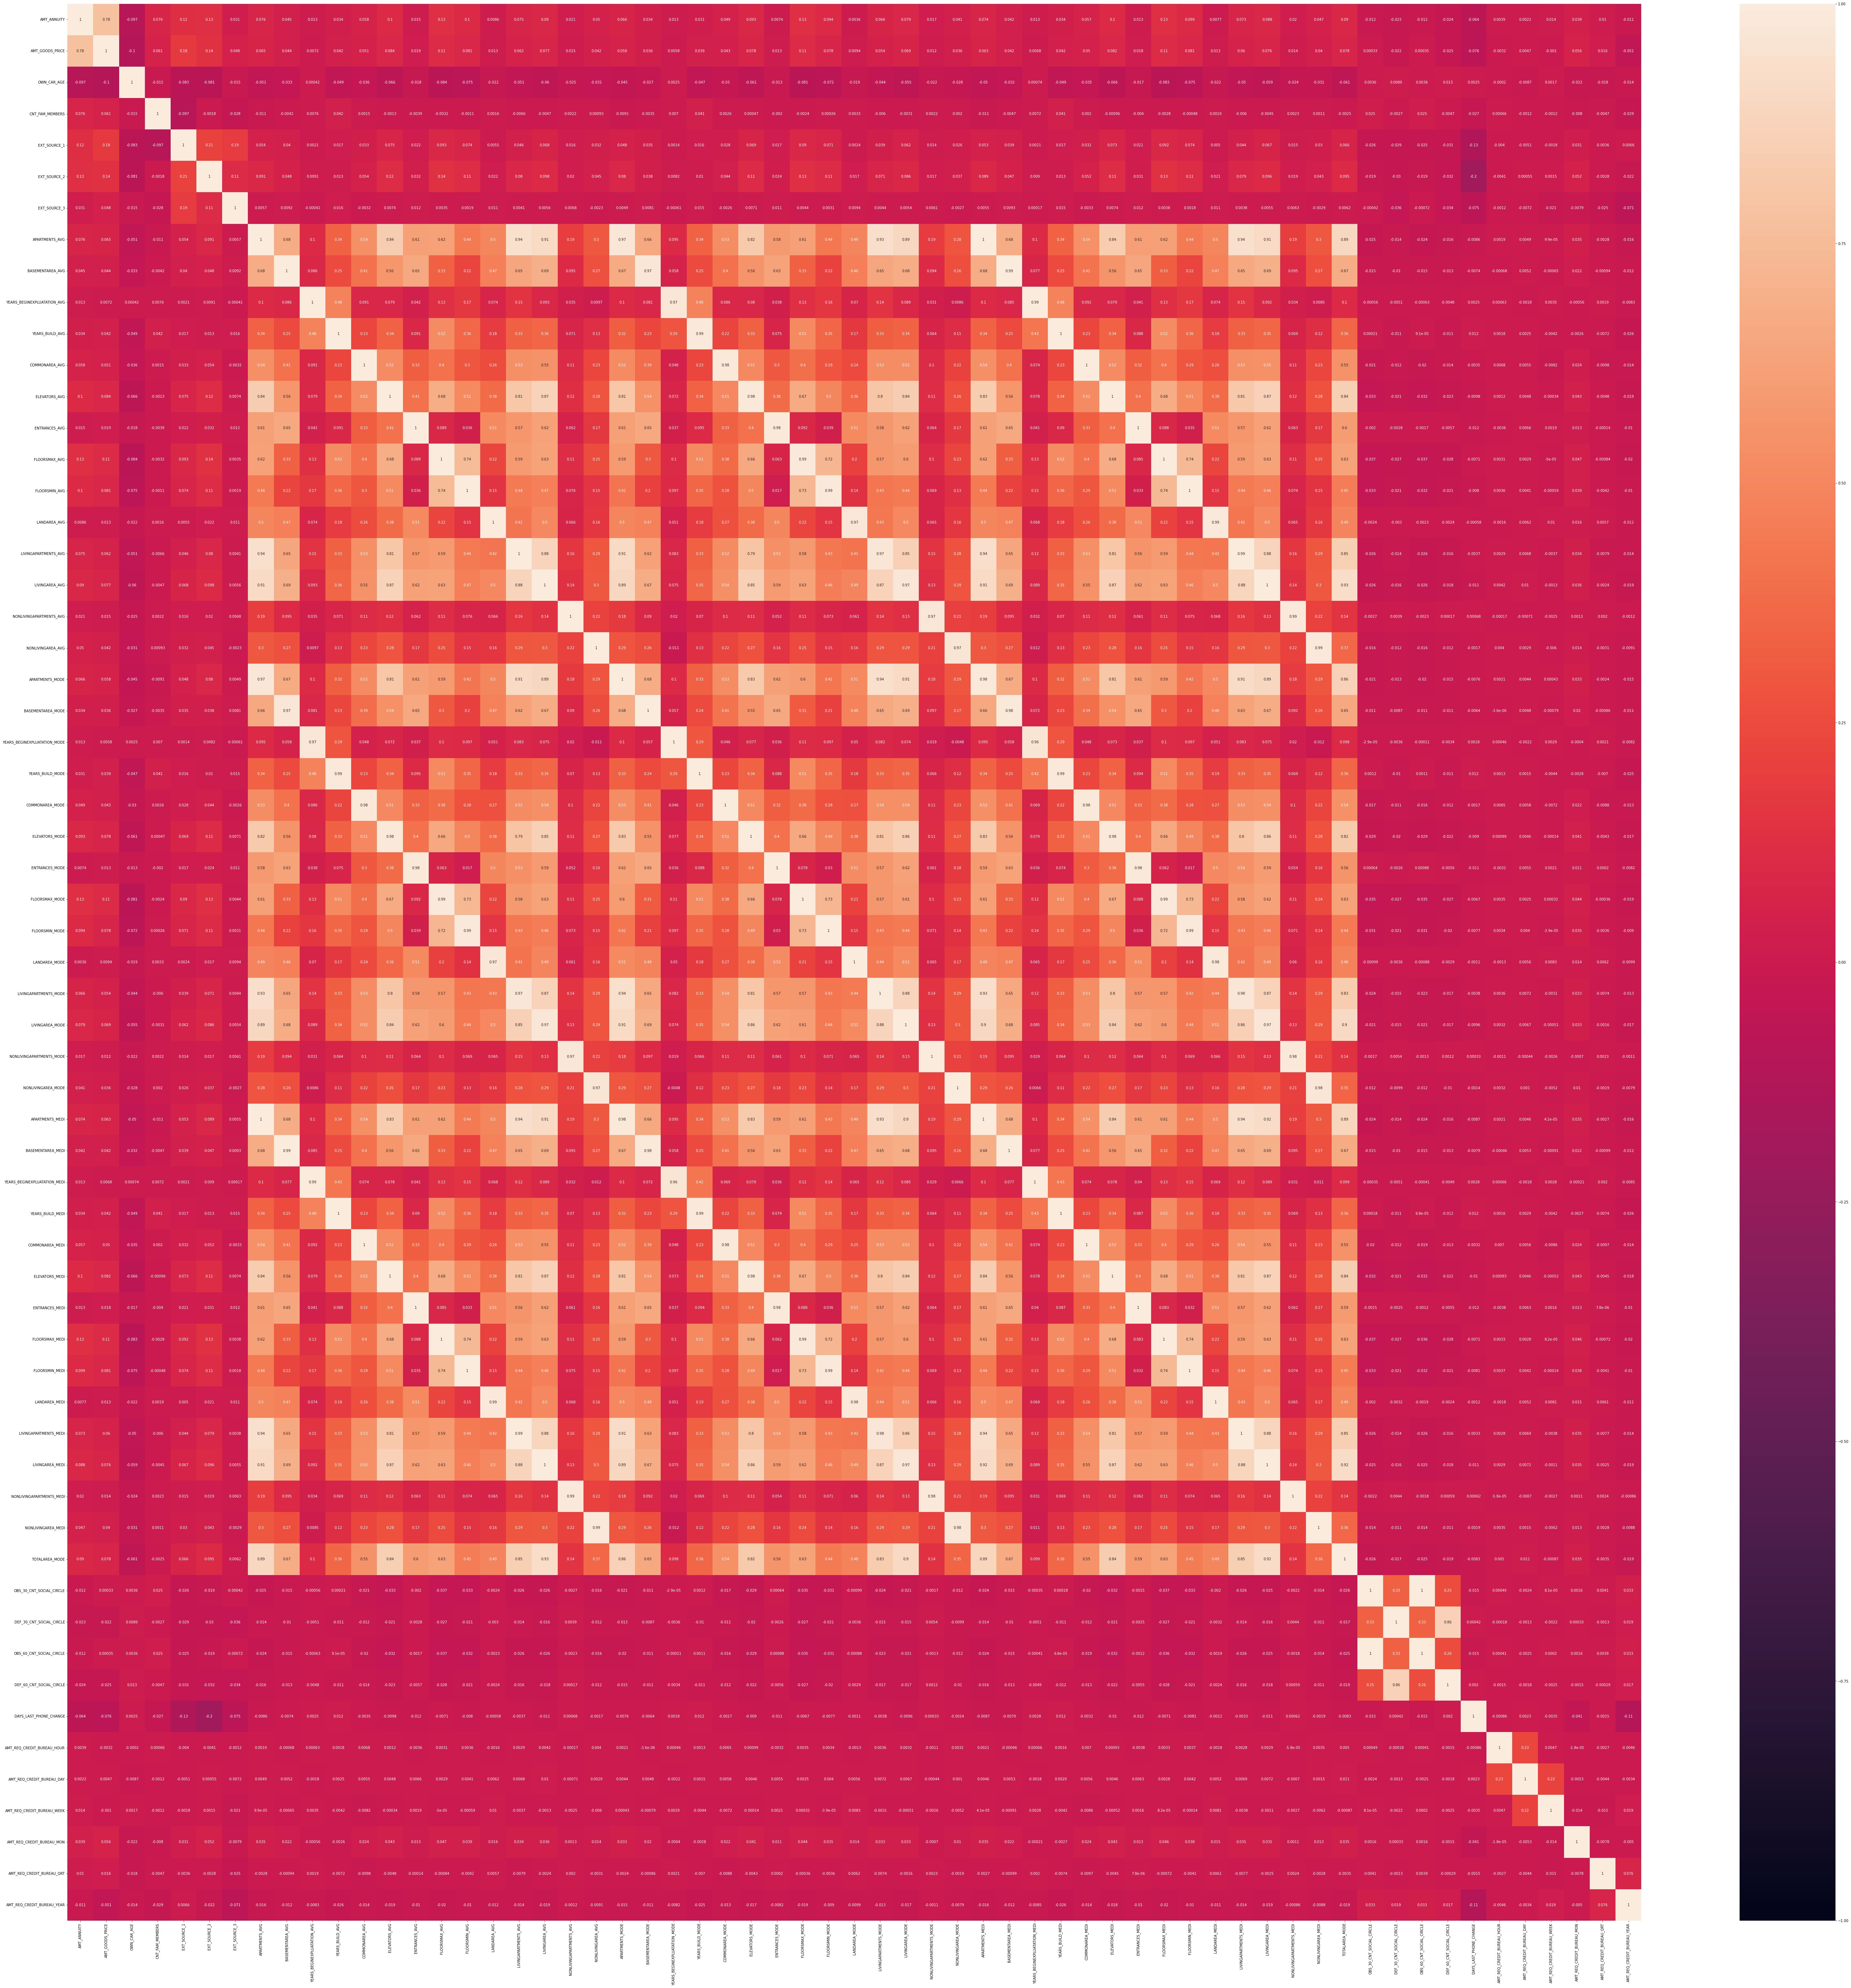

In [31]:
plt.figure(figsize=(100, 100))
sns.heatmap(data_numerical.corr(), vmin=-1, vmax=1, annot=True)

In [72]:
# 找出相關性高於0.7的特徵
matrix = data_numerical.corr()
matrix = matrix.unstack()
matrix = matrix[(matrix<1.0) & (matrix>0.7)]

In [73]:
print(matrix)

AMT_ANNUITY                   AMT_GOODS_PRICE                 0.775109
AMT_GOODS_PRICE               AMT_ANNUITY                     0.775109
APARTMENTS_AVG                ELEVATORS_AVG                   0.836958
                              LIVINGAPARTMENTS_AVG            0.943952
                              LIVINGAREA_AVG                  0.913619
                              APARTMENTS_MODE                 0.973259
                              ELEVATORS_MODE                  0.822553
                              LIVINGAPARTMENTS_MODE           0.930554
                              LIVINGAREA_MODE                 0.893463
                              APARTMENTS_MEDI                 0.995081
                              ELEVATORS_MEDI                  0.835123
                              LIVINGAPARTMENTS_MEDI           0.941907
                              LIVINGAREA_MEDI                 0.912330
                              TOTALAREA_MODE                  0.892627
BASEME

In [76]:
# 抽出想要的留下的特徵(numerical),共28個
wantnum =  data_numerical[['AMT_ANNUITY','AMT_GOODS_PRICE','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','LANDAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','OWN_CAR_AGE','CNT_FAM_MEMBERS','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]
wantnum.head()

,AMT_ANNUITY,AMT_GOODS_PRICE,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,0.0247,0.0369,0.9722,0.6192,0.0143,0.0690,0.0833,0.0369,0.0000,0.0000,2.0,2.0,2.0,2.0,NaN,1.0,0.083037,0.262949,0.139376,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,0.0959,0.0529,0.9851,0.7960,0.0605,0.0345,0.2917,0.0130,0.0039,0.0098,1.0,0.0,1.0,0.0,NaN,2.0,0.311267,0.622246,NaN,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,26.0,1.0,NaN,0.555912,0.729567,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,NaN,2.0,NaN,0.650442,NaN,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,1.0,NaN,0.322738,NaN,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
# Missing values statistics
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
missing_values = missing_values_table(wantnum)
print(missing_values)

Your selected dataframe has 28 columns.
There are 28 columns that have missing values.
                             Missing Values  % of Total Values
COMMONAREA_AVG                       214865               69.9
NONLIVINGAPARTMENTS_AVG              213514               69.4
YEARS_BUILD_AVG                      204488               66.5
OWN_CAR_AGE                          202929               66.0
LANDAREA_AVG                         182590               59.4
BASEMENTAREA_AVG                     179943               58.5
EXT_SOURCE_1                         173378               56.4
NONLIVINGAREA_AVG                    169682               55.2
APARTMENTS_AVG                       156061               50.7
ENTRANCES_AVG                        154828               50.3
FLOORSMAX_AVG                        153020               49.8
YEARS_BEGINEXPLUATATION_AVG          150007               48.8
EXT_SOURCE_3                          60965               19.8
AMT_REQ_CREDIT_BUREAU_QRT      

In [106]:
# 這四個欄位會一起空值，決定填中位數，不使用預測的方法
d = data[['SK_ID_CURR','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE']].head(10000)
d[d.isnull().T.any()]
# d[d.isnull().values==True]

,SK_ID_CURR,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE
68,100080,NaN,NaN,NaN,NaN
394,100457,NaN,NaN,NaN,NaN
397,100460,NaN,NaN,NaN,NaN
457,100527,NaN,NaN,NaN,NaN
1042,101209,NaN,NaN,NaN,NaN
1064,101235,NaN,NaN,NaN,NaN
1156,101358,NaN,NaN,NaN,NaN
1209,101424,NaN,NaN,NaN,NaN
1486,101746,NaN,NaN,NaN,NaN
1743,102038,NaN,NaN,NaN,NaN


In [118]:
data['OBS_60_CNT_SOCIAL_CIRCLE'].median()
data['OBS_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_60_CNT_SOCIAL_CIRCLE'].median())
data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [119]:
data['DEF_60_CNT_SOCIAL_CIRCLE'].median()
data['DEF_60_CNT_SOCIAL_CIRCLE'] = data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_60_CNT_SOCIAL_CIRCLE'].median())
data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [120]:
data['DEF_30_CNT_SOCIAL_CIRCLE'].median()
data['DEF_30_CNT_SOCIAL_CIRCLE'] = data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(data['DEF_30_CNT_SOCIAL_CIRCLE'].median())
data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [121]:
data['OBS_30_CNT_SOCIAL_CIRCLE'].median()
data['OBS_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(data['OBS_30_CNT_SOCIAL_CIRCLE'].median())
data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

0

In [122]:
data['CNT_FAM_MEMBERS'].median()
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].fillna(data['CNT_FAM_MEMBERS'].median())
data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [123]:
data['DAYS_LAST_PHONE_CHANGE'].median()
data['DAYS_LAST_PHONE_CHANGE'] = data['DAYS_LAST_PHONE_CHANGE'].fillna(data['DAYS_LAST_PHONE_CHANGE'].median())
data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

0

In [127]:
# 3個月
data['AMT_REQ_CREDIT_BUREAU_QRT'].median()
data['AMT_REQ_CREDIT_BUREAU_QRT'] = data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(data['AMT_REQ_CREDIT_BUREAU_QRT'].median())
data['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

In [126]:
# 1個月
data['AMT_REQ_CREDIT_BUREAU_MON'].median()
data['AMT_REQ_CREDIT_BUREAU_MON'] = data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(data['AMT_REQ_CREDIT_BUREAU_MON'].median())
data['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

In [128]:
# 1個禮拜
data['AMT_REQ_CREDIT_BUREAU_WEEK'].median()
data['AMT_REQ_CREDIT_BUREAU_WEEK'] = data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(data['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
data['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

In [130]:
# 1個天
data['AMT_REQ_CREDIT_BUREAU_DAY'].median()
data['AMT_REQ_CREDIT_BUREAU_DAY'] = data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(data['AMT_REQ_CREDIT_BUREAU_DAY'].median())
data['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

0

In [131]:
# 1個小時
data['AMT_REQ_CREDIT_BUREAU_HOUR'].median()
data['AMT_REQ_CREDIT_BUREAU_HOUR'] = data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(data['AMT_REQ_CREDIT_BUREAU_HOUR'].median())
data['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

In [133]:
# 1年
data['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
data['AMT_REQ_CREDIT_BUREAU_YEAR'] = data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(data['AMT_REQ_CREDIT_BUREAU_YEAR'].median())
data['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

0

In [75]:
data[['AMT_ANNUITY','AMT_GOODS_PRICE','AMT_CREDIT']].head(20)

,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_CREDIT
0,24700.5,351000.0,406597.5
1,35698.5,1129500.0,1293502.5
2,6750.0,135000.0,135000.0
3,29686.5,297000.0,312682.5
4,21865.5,513000.0,513000.0
5,27517.5,454500.0,490495.5
6,41301.0,1395000.0,1560726.0
7,42075.0,1530000.0,1530000.0
8,33826.5,913500.0,1019610.0
9,20250.0,405000.0,405000.0


In [43]:
# 查看AMT_ANNUITY和AMT_CREDIT之間的關係(作圖)
import matplotlib.pyplot as plt

In [56]:
indexnum = list(data.index)
indexnum = indexnum[0:100]
AMT_ANNUITY = list(data['AMT_ANNUITY'].head(100))
AMT_CREDIT = list(data['AMT_CREDIT'].head(100))

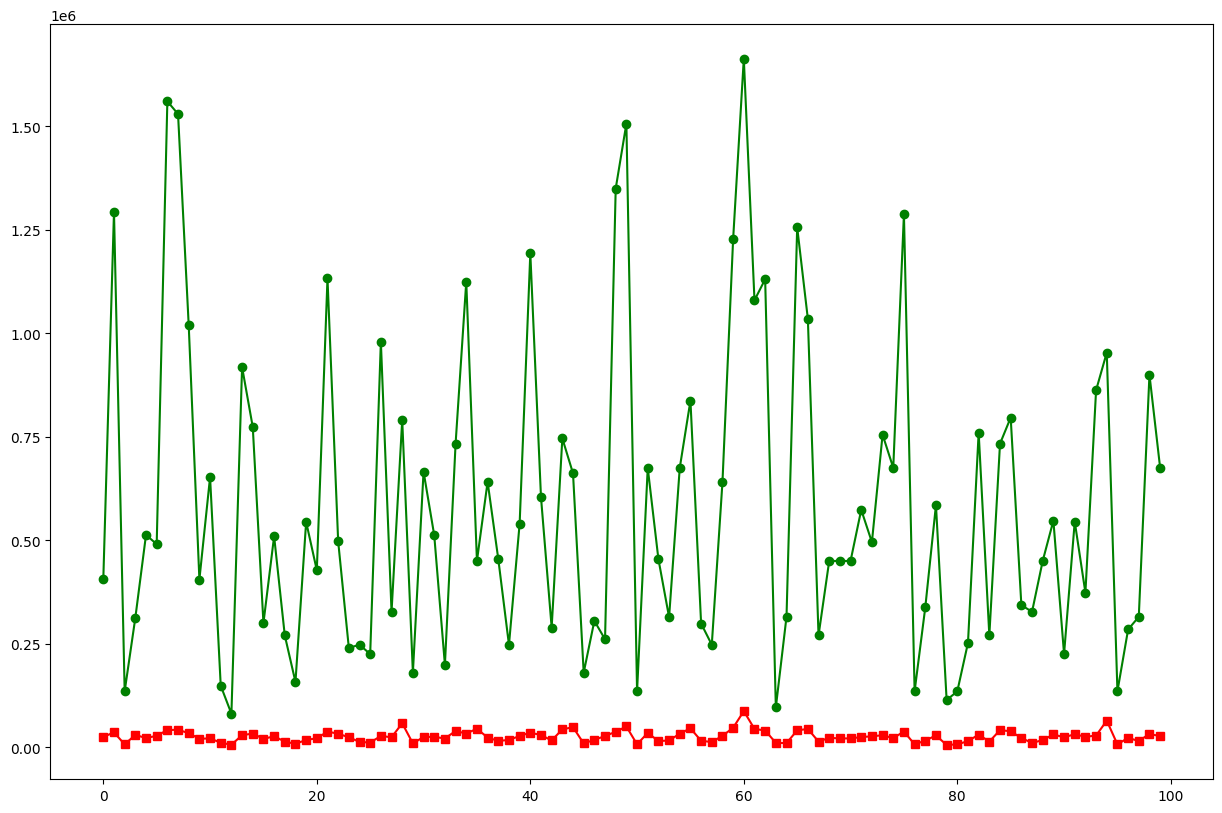

In [57]:
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)
plt.plot(AMT_ANNUITY,'s-',color = 'r', label="AMT_ANNUITY ")
plt.plot(AMT_CREDIT,'o-',color = 'g', label="AMT_CREDIT")

In [58]:
data[['AMT_ANNUITY','AMT_CREDIT']].corr()

,AMT_ANNUITY,AMT_CREDIT
AMT_ANNUITY,1.000000,0.770138
AMT_CREDIT,0.770138,1.000000
